# FP1: Massenspektrometer

## Init
(pakete laden, funktionen definieren, plotstyle definieren)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import uncertainties as unc
import uncertainties.unumpy as unp
import matplotlib as mpl


# define plot parameters
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.minor.size'] = 3.5
mpl.rcParams['xtick.major.pad'] = 7
mpl.rcParams['xtick.minor.pad'] = 7
mpl.rcParams['ytick.major.pad'] = 7
mpl.rcParams['ytick.minor.pad'] = 7
mpl.rcParams['axes.linewidth'] = 1.25
mpl.rcParams['legend.borderaxespad'] = 1
mpl.rcParams['axes.labelpad'] = 10
plt.rc('text', usetex=True)
# plt.rc("text.latex", preamble="\\usepackage{xcolor} \\usepackage{siunitx} \\usepackage{amsmath}")# enable use of LaTeX in matplotlib
plt.rc('font', family="serif", size=15)  # font settings

# define fit functions
def linear(x, a, b):
    return a*x + b

def lorentz(x, A, x0, FWHM):
    return A/np.pi * FWHM/2 / ((x - x0)**2 + (FWHM/2)**2)
    

## Ergebnisse

### Aufgabe 1

Aus dem ersten aufgenommenen Spektrum sollen die Primärionen und Wassercluster identifiziert werden. In der untenstehenden Abbildung ist das aufgenommene Spektrum zu sehen. Da die Versuche nur mit Ionisation mit Wasserdampf ablaufen, sind keine Ammoniakcluster zu erwarten. Für das Primärion H<sub>3</sub>O<sup>+</sup> ist ein Peak bei 19.0814 Th zu erwarten, für den Wassercluster ein Peak bei 37.02897 Th. Die Einheit Thomson (Th) ist hierbei definiert als $$1\:\mathrm{Th}=\frac{1\:\mathrm{u}}{e}.$$

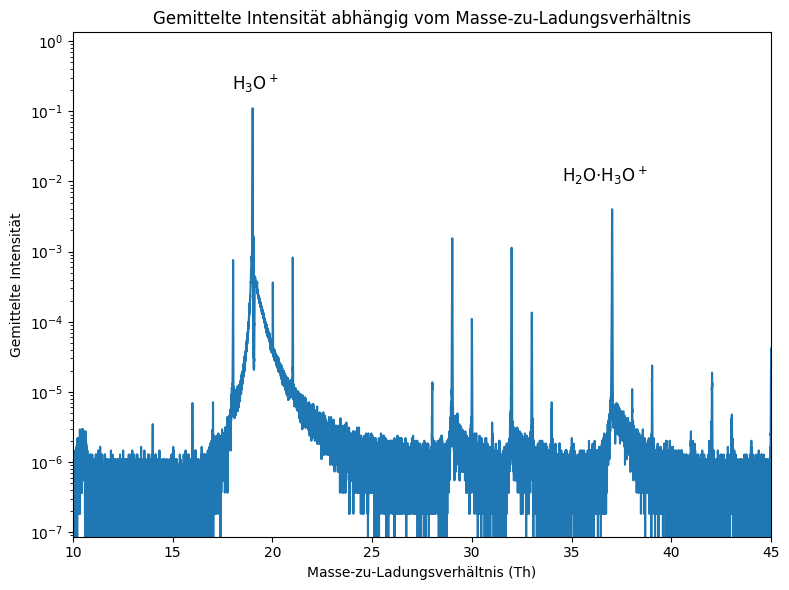

In [13]:
# Datei einlesen
df = pd.read_csv(r'Ex1.1.txt', sep='\t', skiprows=11, header=0)

# Die letzten drei Spalten auswählen
df = df[['mass', 'tof (mus)', 'Average']]

#Jetzt wird geplottet
plt.figure(figsize=(8,6))
plt.plot(df['mass'], df['Average'] )
plt.yscale('log')
#Jetzt wird die x che eingeschränkt auf  1 bis 50
plt.xlim(10, 45)
plt.xlabel('Masse-zu-Ladungsverhältnis (Th)')
#Testbeschriftung für den funkt 19, 10^-1 
plt.text(18, 10**-1+0.1 , 'H$_3$O$^+$', fontsize=12, color='black')
plt.text(34.5, 10**-2 , 'H$_2$O$\cdot$H$_3$O$^+$', fontsize=12, color='black')
plt.ylabel('Gemittelte Intensität')
plt.title('Gemittelte Intensität abhängig vom Masse-zu-Ladungsverhältnis')
#plt.legend()
plt.tight_layout()
plt.show()

Mithilfe von Fits an die Peaks im Spektrum (in TofDAQ Viewer erstellt) erhalten wir ein Masse-zu-Ladungsverhältnis von 19.01271 Th für das Primärion H<sub>3</sub>O<sup>+</sup>, für den Wassercluster H<sub>2</sub>O $\cdot $ H<sub>3</sub>O<sup>+</sup>ergibt sich 37.02609 Th. Die Abweichung vom Messergebnis zum Literaturwert beträgt also nur 0.35 % bzw 0.007 %, die Messergebnisse unterstützen also die berechneten Werte. 

Ein Fragment von C<sub>6</sub>H<sub>4</sub>ClI
 liegt bei einem Massen-Ladungsverhältnis von 112. Bei der gesuchten Fragmentation wird das Iod-Atom aus dem Molekül entfernt, man erhält dann das Molekül C<sub>6</sub>H<sub>4</sub>ClIH<sup>+</sup>. Die atomare Masse dieses Moleküls beträgt 112 unit, beziehungsweise ein Massen-Ladungsverhältnis von 112 unit/$e$. Dabei entsteht dieser Peak beim Standardvorkommen aller Moleküle, also $^{12}_6\mathrm{C}$, $^{1}_1\mathrm{H}$ und $^{35}_{17}\mathrm{Cl}$. Die Struktur des ursprünglichen Moleküls. in untenstehender Abbildung ist die Struktur von 1-Chlor-4-iodbenzol zu sehen, man kann gut erkennen, wie bei der Fragmentation das Iod entfernt wird. 

 ![Struktur von 1-Chlor-4-iodbenzol](http://www.strukturformelzeichner.de/strukturformeln/sf20240508/sfz20240508-182315-235-11d80291.png)








Was ändert sich beim Variieren der Spannungen?


Für das Kalibrieren der Massenachse wurden drei Peaks verwendet. Hier wurden die Peaks von zwei Isotopen von C<sub>6</sub>H<sub>4</sub>ClI, nämlich bei 238.9125 Th und bei 240,90168 Th verwendet. Zudem wird mit dem Peak bei 21.0226 Th eines H<sub>3</sub>O-isotops kalibriert. Aufgrund der Totzeit können manche Peaks nicht vollständig aufgezeichnet werden, sondern brechen nach einem gewissen Anstieg ab. Dadurch kann weder die Höhe, noch die genau Position des Peaks bestimmt werden. Dies tritt beispielsweise beim Peak bei 19.0184 Th auf, der deshalb nicht für die Kalibrierung verwendet werden kann. 

In [2]:
def init_df(name):
    # load df
    df = pd.read_csv(f'data/{name}.txt', sep='\t', skiprows=11, header=0, encoding='iso-8859-1')
    # add column with indeces
    df['index'] = np.arange(len(df))
    df.columns = ['m', "tof", 'avg', 'index']
    return df

def m_to_idx(m, df):
    return df[df.m > m].iloc[0, 3]

### Aufgabe 2

Als nächstes charakterisieren wir das Messgerät indem wir ein Eichgas mit bekannten Inhaltsstoffen (und deren Konzentrationen!) untersuchen. Dafür wurde zuerst bereinigte Luft mit 2 l/min angesaugt, um ein Hintergrundsignal ohne Eichgas zu erhalten. Daraufhin wurde Eichgas bei 5 verschiedenen Flussraten (F = [2.5, 4, 5, 7.5, 10] ml/min) beigemengt und erneut Spektren aufgenommen. Zieht man nun das Hintergrundsignal  von den Spektren mit Eichgas ab, dann sind Peaks an den Massen der Eichmoleküle klar erkennbar. Für eine weitere Analyse wurden 3 Prominente Peaks ausgewählt, bei 45.034 Th (Acetaldehyd), 59.049 Th (Aceton) und 71.049 Th (Methylvinylketon). Für jeden dieser Moleküle wurde mittels dem RawA Feld in TOFDAQ Viewer die Zählrate in cps abgelesen. Diese kann nun in Abhängigkeit der Konzentration des Eichgases dargestellt werden. Die Theorie sagt ein linear ansteigendes Verhalten voraus, da mit höherer Konzentration auch mehr Moleküle ionisiert werden und somit mehr Ionen detektiert werden. Die Steigung dieser Geraden ist die Effizienz $\epsilon$ des Massenspektrometers, weshalb lineare Funktionen an die Daten angepasst wurden. 

Weiters lässt sich das sogenannte "limit of detection", kurz LOD, berechnen. Dieses gibt an, wie hoch die Konzentration eines Stoffes sein muss, damit er noch detektiert werden kann. Es wird berechnet als $LOD = 2\sigma/\epsilon$, wobei $\sigma$ die Standardabweichung des Hintergrundsignals ist.

Zuletzt kann man noch die Massenauflösung R des Spektrometers berechnen. Diese ist definiert als das Verhältnis von Masse m und Full Width at Half Maximum (FWHM) des jeweiligen Peaks.  Dafür wurde der zu untersuchende Peak in einem Intervall vom 0.35u isoliert und eine Lorentzfunktion an die Daten gefittet. Die Masse m und die FWHM wurde mitsamt Unsicherheit aus dem Fit bestimmt. 

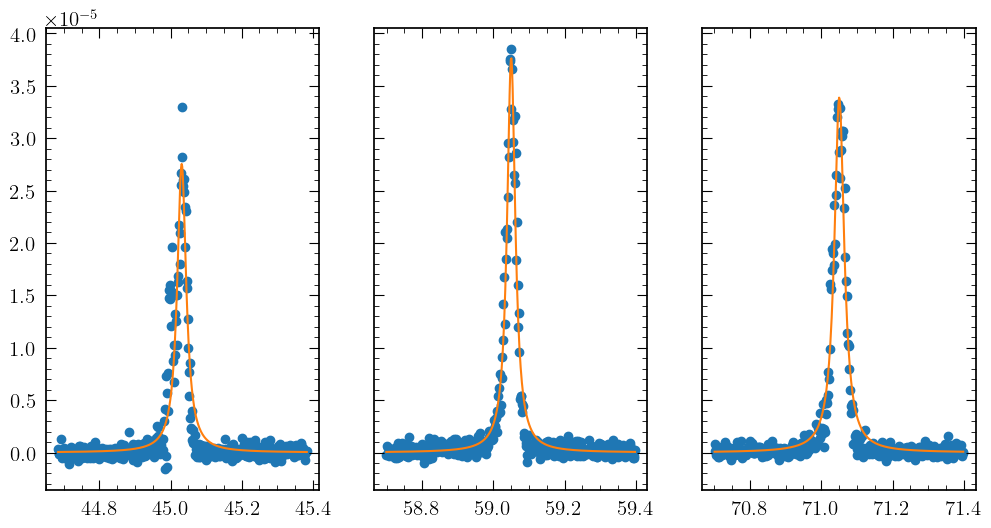

In [28]:
# load data
df = init_df('test')

# calculate std dev in region without peaks (150u - 230u)
start, stop = m_to_idx(150, df), m_to_idx(230, df)
delta = np.std(df.avg[start:stop])

# peaks to analyze
peaks = [45.034, 59.049, 71.049]

# start 
fig, ax = plt.subplots(1, len(peaks), figsize=(12, 6), sharey=True)
# array to store resolution
R = unp.uarray(np.zeros(len(peaks)), np.zeros(len(peaks)))
# iterate through peaks
for (i, peak) in enumerate(peaks):
    # find start and stop index for peakn and create temporary df for interval of interest
    start, stop = m_to_idx(peak - 0.35, df), m_to_idx(peak + 0.35, df)
    tempdf = df[start:stop]
    # fit lorentz to data
    popt, pcov = curve_fit(lorentz, tempdf.m, tempdf.avg, p0=[1e-5, peak, 1e-2])
    perr = np.sqrt(np.diag(pcov))
    # calculate m and FWHM with uncertainties
    m = unc.ufloat(popt[1], perr[1])
    FWHM = unc.ufloat(popt[2], perr[2])
    # calculate resolution from m and FWHM
    R[i] = m/FWHM
    
    # uncomment to see plots
    ax[i].scatter(tempdf.m, tempdf.avg)
    ax[i].plot(tempdf.m, lorentz(tempdf.m, *popt), c="C1")
    # ax[i].set_yscale('log')



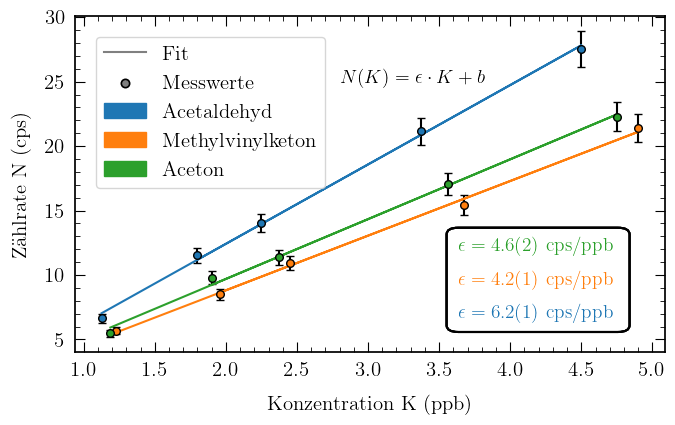

,Molekül,Masse m/u,Protonenaffinität (kJ/mol) [NIST],Effizienz (cps/ppb),LOD (1/ppb),R
0,Acetaldehyd,45.034,768.5,6.16+/-0.14,0.1146+/-0.0026,(1.48+/-0.05)e+03
1,Methylvinylketon,59.049,834.7,4.24+/-0.13,0.167+/-0.005,(2.12+/-0.04)e+03
2,Aceton,71.049,812.0,4.64+/-0.16,0.152+/-0.005,(2.13+/-0.04)e+03


In [30]:
# FC4 flow rate in l/min
FC4 = np.array([25, 50, 75, 100, 40])/100/100
# FC5 flow rate in l/min
FC5 = 0.2*10
# concentrations in ppm
pdict = {"m45" : 0.9, "m71" : 0.98, "m59" : 0.95}
# cps for each molecule as read from TOFDAQ Viewer
cpsdict = {"m45" : [6.63, 14.014, 21.153, 27.546, 11.525], "m71" : [5.68, 10.91, 15.40, 21.41, 8.505], "m59" : [5.47, 11.37, 17.06, 22.28, 9.80]}

# array to store efficiency
epsilon = unp.uarray(np.zeros(3), np.zeros(3))
fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))
for (i, m) in enumerate(["m45", "m71", "m59"]):
    # calculate concentration in ppb by 
    x = FC4/FC5 * pdict[m]*1e3
    # fit linear function to data
    popt, pcov = curve_fit(linear, x, cpsdict[m])
    perr = np.sqrt(np.diag(pcov))
    epsilon[i] = unc.ufloat(popt[0], perr[0])
    # start plotting
    ax.errorbar(x, cpsdict[m], yerr=[k*0.05 for k in cpsdict[m]], fmt=".", capsize=3, mfc=f"C{i}", mec="k", ms=11, ecolor="k")
    ax.plot(x, linear(x, *popt), c=f"C{i}")
#   add efficiency as text
    ax.text(0.65, 0.1 + 0.1*i, f"$\epsilon = {unc.ufloat(popt[0], perr[0]):.1uS}\ \mathrm{{cps/ppb}}$", transform=ax.transAxes, fontsize=14, c=f"C{i}")
    rect = mpl.patches.FancyBboxPatch((0.65, 0.08), 0.27, 0.27, linewidth=1.5, edgecolor="k", facecolor="none", transform=ax.transAxes, boxstyle=mpl.patches.BoxStyle("Round", pad=0.02))
    ax.add_patch(rect)
    
#   add fit function as text
ax.text(0.45, 0.8, "$N(K) = \epsilon\cdot K + b$", transform=ax.transAxes, fontsize=14)
xlim, ylim = ax.get_xlim(), ax.get_ylim()
    
#   plot legend
plt.plot(0, 0, label="Fit", c="gray")
plt.scatter(0, 0, label="Messwerte", c="gray", ec="k", lw=1.2)
for (i, name) in enumerate(["Acetaldehyd", "Methylvinylketon", "Aceton"]):
    plt.fill_between([0, 0], [0, 0], [0, 0], color=f"C{i}", alpha=1, label=name)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('Konzentration K (ppb)')
plt.ylabel('Zählrate N (cps)')
plt.legend()
plt.tight_layout()
plt.show()

# calculate LOD from epsilon and delta in ppb
LOD = 2*delta/epsilon * 1e6

# print results in nice table
tabledf = pd.DataFrame()
tabledf["Molekül"] = ["Acetaldehyd", "Methylvinylketon", "Aceton"]
tabledf["Masse m/u"] = [45.034, 59.049, 71.049]
tabledf["Protonenaffinität (kJ/mol) [NIST]"] = [768.5, 834.7, 812]
tabledf["Effizienz (cps/ppb)"] = epsilon
tabledf["LOD (1/ppb)"] = LOD
tabledf["R"] = R
tabledf

Schaut man sich die Ergebnisse an, dann kann man das lineare Verhalten der Zählraten mit zunehmender Konzentration erkennen. Die Effizienzen hängen vom Molekül ab, da diese unterschiedliche Protonenaffinitäten haben und somit unterschiedlich gut ionisiert werden. Der LOD hängt sowohl von der Standardabweichung vom Hintergrundsignal, als auch von der Effizienz ab. Nachdem die Effizienz vom Molekül und vom Messinstrument abhängt, kann man das LOD nur verbessern indem man das Hintergrundrauschen minimiert (zb durch längere Messintervalle). Die Massenauflösung R gibt an, wie gut das Spektrometer in der Lage ist, zwei Peaks zu unterscheiden. Man kann erkennen, dass bei steigendem R das LOD auch steigt. Das gegenteilige Verhalten ist aber zu erwarten, da mit zunehmender Massenauflösung die weniger counts eines Moleküls gemessen werden müssen, um es zu detektieren, was zu einem niedrigeren LOD führt.

Die Daten passen innerhalb der Fehlerbalken gut zu der Theorie (die Fehler sind sogar etwas zu groß abgeschätzt) und es sind keine nichtlinearitäten beobachtbar. Längere Messintervalle könnten aber die Genauigkeit der Messung erhöhen und somit subtile Abweichungen sichtbar machen, für die unsere Auflösung und limitierten Datenpunkte nicht ausreichen. 

Zuletzt wollen wir noch die Reaktionszeit des Massenspektrometers abschätzen. Dafür nehmen wir Standardbedingungen und eine massenunabhängige Transmission an. Die Aufenthaltszeit wird über die mittlere freie weglänge in luft und der Geschwindigkeit in der Kammer abgeschätzt. Die Geschwindigkeit wird über die kinetische Energie der Ionen und der Ladung berechnet. 

In [38]:
# define constants
tau = 1
n0 = 2.5e19
p0 = 101325
T0 = 273.15
# annahme TR = T0
TR = T0
pR = 230

# estimate free mean path using d of air molecules
kB = 1.38e-23
d = 3e-9
lam = kB*TR/(np.sqrt(2)*np.pi*d**2*pR)
U = 715
q = 1.6e-19
v = np.sqrt(2*q*U/[peaks])
t = lam/v
v

2.2540199121865505e-09

 Um schlussendlich auf die Reaktionszeit zu bestimmen müssen wir die Flussrate der Primärionen abschätzen. 
